# Exploring data
### 1. Loading and viewing your data
This is a subset of the Department of Buildings Job Application Filings dataset from the [NYC Open Data portal](http://opendata.cityofnewyork.us/). This dataset consists of job applications filed on January 22, 2017.

Load this dataset into a DataFrame and then inspect it using the `.head()` and `.tail()` methods. However, printed results alone is not useful, since there are too many columns. Therefore, data must be looked at another way.

The `.shape` and `.column`s attributes let you see the shape of the DataFrame and obtain a list of its columns. 

This initial exploratory analysis is a crucial first step of data cleaning.

In [3]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv("datasets/dob_job_application_filings.csv")

In [5]:
# Print the head of df
print(df.head())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

   ...               Owner's Last Name             Owner's Business Name  \
0  ...  MIGLIORE                        MACKLOWE MANAGEMENT                
1  ...  BLUMENBERG                      NA            

In [14]:
# Print the tail of df
print(df.tail())

           Job #  Doc #        Borough       House #  \
12841  520143988      1  STATEN ISLAND  8              
12842  121613833      1      MANHATTAN  724            
12843  121681260      1      MANHATTAN  350            
12844  320771704      1       BROOKLYN  499            
12845  520143951      1  STATEN ISLAND  1755           

                            Street Name  Block  Lot    Bin # Job Type  \
12841  NOEL STREET                        5382   20  5069722       A2   
12842  10 AVENUE                          1059    4  1082503       A2   
12843  MANHATTAN AVE.                     1848   31  1055849       A2   
12844  UNION STREET                        431   43  3007185       A2   
12845  RICHMOND ROAD                       887   28  5022931       A2   

      Job Status  ...               Owner's Last Name  \
12841          D  ...  MALITO                           
12842          D  ...  CROMAN                           
12843          A  ...  ARYEH                         

In [12]:
# Print the shape of df
print(df.shape)

(12846, 82)


In [10]:
# Print the columns of df
print(df.columns)

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In addition to the suspicious number of `0` values, which may represent missing data, the columns that contain monetary values - `'Initial Cost'` and `'Total Est. Fee'` - have a dollar sign in the beginning. These columns may be coded as strings instead of numeric values.

### 2. Further diagnosis
The `.info()` method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will confirm whether the `'Initial Cost'` and `'Total Est. Fee'` columns are numeric or strings.

In [131]:
df_subset = df[["Job #","Doc #","Borough","Initial Cost", "Total Est. Fee","Existing Zoning Sqft",  
                "Proposed Zoning Sqft", "Enlargement SQ Footage", "Street Frontage", "ExistingNo. of Stories",
               "Proposed No. of Stories","Existing Height","Proposed Height"  ]]

In [18]:
# Print the info of df
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB
None


The columns `'Initial Cost'` and `'Total Est. Fee'` are of type `object`. The currency sign in the beginning of each value in these columns needs to be removed, and the columns need to be converted to numeric. In the full DataFrame, note that there are a lot of missing values. There are also a lot of `0` values. Given the amount of data that is missing in the full dataset, it's highly likely that these `0` values represent missing data.

In [19]:
df_subset.describe()

,Job #,Doc #,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
count,1.284600e+04,12846.000000,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000
mean,2.426788e+08,1.162930,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562
std,1.312507e+08,0.514937,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666
min,1.036438e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.216206e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000
50%,2.202645e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000
75%,3.208652e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000
max,5.400246e+08,9.000000,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000


### 3. Frequency counts for categorical data
`.describe()` can only be used on numeric columns. So how one can diagnose data issues when you have categorical data? One way is by using the `.value_counts()` method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called `dropna` which is `True` by default. What this means is if having missing data in a column, it will not give a frequency count of them. Set the `dropna` column to `False` so if there are missing values in a column, it will give the frequency counts.

Look at the `'Borough'`, `'State'`, and `'Site Fill'` columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the `'State'` column from NY, for example? Since the dataset consists of applications filed in NY, this is expected to be the case.

In [26]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64


In [27]:
# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

NY    12391
NJ      241
PA       38
CA       20
OH       19
IL       17
FL       17
CT       16
TX       13
TN       10
DC        7
MD        7
GA        6
KS        6
MA        6
VA        5
CO        4
WI        3
AZ        3
SC        3
MN        3
RI        2
NC        2
UT        2
VT        1
IN        1
NM        1
WA        1
MI        1
Name: State, dtype: int64


In [28]:
# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


Notice how not all values in the `'State'` column are `NY`. This is an interesting find, as this data is supposed to consist of applications filed in `NYC`. Curiously, all the `'Borough'` values are correct. A good start as to why this may be the case would be to find and look at the codebook for this dataset. Also, for the `'Site Fill'` column, recoding the `NOT APPLICABLE` values to `NaN` in the final analysis may or may not be needed.

### 4. Visualizing single variables with histograms
One of the best ways to confirm what the numbers saying is to plot and visualise the data.

Start by visualizing single variables using a histogram for numeric values. Work on the column `'Existing Zoning Sqft'`.

The `.plot()` method creates a plot of each column of a DataFrame. The `kind` parameter specifies the type of plot to use - `kind='hist'`, for example, plots a histogram.

Compute the summary statistics for the `'Existing Zoning Sqft'` column using the `.describe()` method. 

In [33]:
# Describe the column
df['Existing Zoning Sqft'].describe()

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64

There are extremely large differences between the `min` and `max` values, and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a log scale. The keyword arguments `logx=True` or `logy=True` can be passed in to `.plot()` depending on which axis you want to rescale.

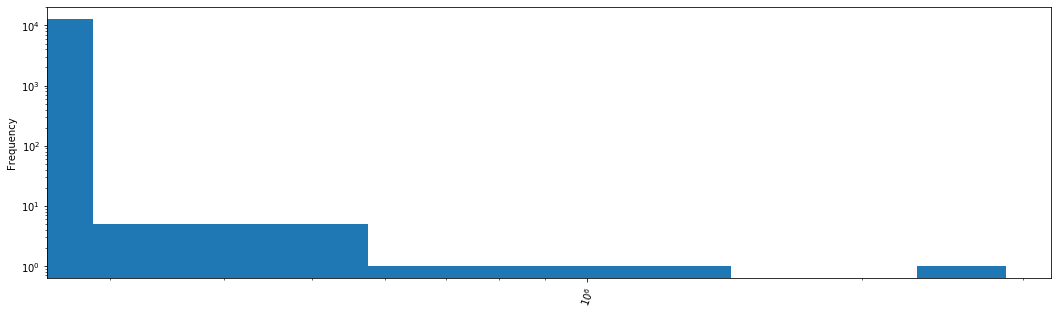

In [37]:
%matplotlib inline
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True, figsize=(18, 5))

# Display the histogram
plt.show()

A plot is rendered such that the axis holds all the information. That is, if large amounts of whitespace is present in the plot, it indicates counts or values are too small to render.

While visualizing data is a great way to understand it, keep in mind that no one technique is better than another. Looking at summary statistics is still needed to help understand the data better. A large amount of counts on the left side of the plot is expected because the 25th, 50th, and 75th percentiles have a value of 0. The plot shows that there are barely any counts near the `max` value, signifying an outlier.

### 5.  Visualizing multiple variables with boxplots
Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical.

Use a boxplot to compare the `'ExistingNo. of Stories'` across the different values of the `'Borough'` column. The pandas `.boxplot()` method is a quick way to do this, the column is specified and by parameters.

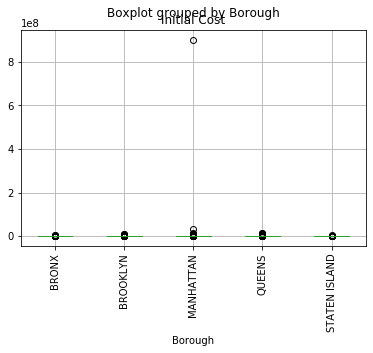

In [94]:
# Create the boxplot
df_subset.boxplot(column="Initial Cost", by="Borough", rot=90);

Extreme outliers are in the borough of Manhattan. An initial guess could be that since land in Manhattan is extremely expensive, these outliers may be valid data points. Again, further investigation is needed to determine whether or not to drop or keep those points in the data.

### 1.6 Visualizing multiple variables with scatter plots
Boxplots are great for numeric columns to compare across different categories. However for visualising two numeric columns, scatter plots are ideal.

Make a scatter plot with `'initial_cost'` on the x-axis and the `'total_est_fee'` on the y-axis. Use the DataFrame `.plot()` method with `kind='scatter'`. 

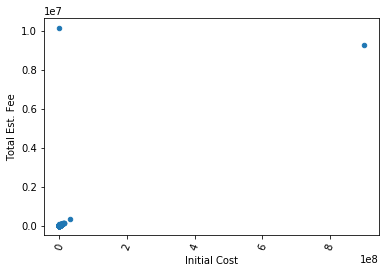

In [91]:
# Create and display the first scatter plot
df_subset.plot(kind="scatter", x="Initial Cost", y="Total Est. Fee", rot=70)
plt.show()

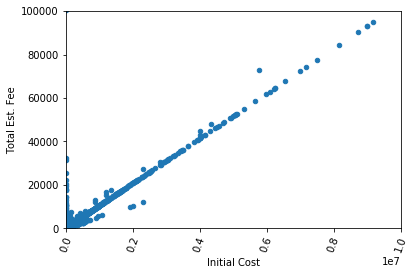

In [104]:
# Create and display the first scatter plot
df_subset.plot(kind="scatter", x="Initial Cost", y="Total Est. Fee", rot=70, ylim= (0, 1e5), xlim = (0, 1e7))
plt.show()

There are 2 major outliers shown in the plots.

In general, from the second plot it seems like there is a strong correlation between `'initial_cost'` and `'total_est_fee'`. In addition, take note of the large number of points that have an `'initial_cost'` of `0`. It is difficult to infer any trends from the first plot because it is dominated by the outliers.